## 1. Chart Decision Framework

### Kapan Menggunakan Chart Apa?

| Tujuan Komunikasi | Chart Type | Kapan Digunakan |
|-------------------|------------|-----------------|
| **Perbandingan** | Bar Chart, Column Chart | Membandingkan nilai antar kategori |
| **Distribusi** | Histogram, Box Plot, Violin | Melihat spread dan outliers |
| **Tren/Waktu** | Line Chart, Area Chart | Menunjukkan perubahan over time |
| **Hubungan** | Scatter Plot, Bubble Chart | Korelasi antar variabel |
| **Komposisi** | Pie Chart, Stacked Bar | Part-to-whole relationships |
| **Lokasi** | Map, Choropleth | Geographic patterns |
| **Pola** | Heatmap, Matrix | Multidimensional patterns |

### Best Practices

- ✅ **Less is More**: Sederhana lebih baik daripada kompleks
- ✅ **Signal > Noise**: Hapus elemen yang tidak perlu (chart junk)
- ✅ **Consistency**: Gunakan style yang konsisten
- ✅ **Accessibility**: Pertimbangkan colorblind-friendly palette
- ✅ **Context**: Selalu berikan konteks dan reference points

---

In [1]:
# Setup Environment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import patches
import warnings

warnings.filterwarnings('ignore')

# Konfigurasi style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("notebook", font_scale=1.1)
sns.set_palette("Set2")

# Set figure default size
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['figure.dpi'] = 100

print("✅ Environment setup complete!")
print(f"📦 Matplotlib: {plt.matplotlib.__version__}")
print(f"📦 Seaborn: {sns.__version__}")

✅ Environment setup complete!
📦 Matplotlib: 3.10.7
📦 Seaborn: 0.13.2


## 2. Data Preparation

Mari kita siapkan berbagai dataset untuk praktik visualisasi:

In [2]:
# Set random seed
np.random.seed(42)

# ===== Dataset 1: Sales Performance =====
regions = ['North', 'South', 'East', 'West', 'Central']
quarters = ['Q1', 'Q2', 'Q3', 'Q4']

sales_data = []
for region in regions:
    for quarter in quarters:
        sales_data.append({
            'Region': region,
            'Quarter': quarter,
            'Sales': np.random.randint(50000, 200000),
            'Units': np.random.randint(500, 2000),
            'Customers': np.random.randint(100, 500)
        })

df_sales = pd.DataFrame(sales_data)

# ===== Dataset 2: Customer Demographics =====
age_groups = ['18-25', '26-35', '36-45', '46-55', '56+']
df_demographics = pd.DataFrame({
    'Age_Group': age_groups,
    'Count': [1200, 2500, 1800, 1000, 600],
    'Avg_Spend': [85, 150, 200, 175, 120]
})

# ===== Dataset 3: Time Series =====
dates = pd.date_range('2024-01-01', periods=365, freq='D')
df_timeseries = pd.DataFrame({
    'Date': dates,
    'Value': np.cumsum(np.random.randn(365)) + 100,
    'Category': np.random.choice(['A', 'B', 'C'], 365)
})

print("📊 Datasets Created Successfully!")
print(f"\n1. Sales Performance: {df_sales.shape}")
print(df_sales.head())
print(f"\n2. Demographics: {df_demographics.shape}")
print(df_demographics)
print(f"\n3. Time Series: {df_timeseries.shape}")
print(df_timeseries.head())

📊 Datasets Created Successfully!

1. Sales Performance: (20, 5)
  Region Quarter   Sales  Units  Customers
0  North      Q1  171958   1959        448
1  North      Q2  153694   1630        171
2  North      Q3  160268   1544        202
3  North      Q4  187337    966        314
4  South      Q1  137498    587        472

2. Demographics: (5, 3)
  Age_Group  Count  Avg_Spend
0     18-25   1200         85
1     26-35   2500        150
2     36-45   1800        200
3     46-55   1000        175
4       56+    600        120

3. Time Series: (365, 3)
        Date      Value Category
0 2024-01-01  98.806842        C
1 2024-01-02  98.397790        B
2 2024-01-03  97.951048        C
3 2024-01-04  99.475290        A
4 2024-01-05  99.798290        A


## 3. Bar Charts - Untuk Perbandingan

Bar charts sangat efektif untuk membandingkan nilai antar kategori.

### Prinsip Bar Chart yang Baik:
- Start axis at zero (jangan truncate)
- Sort bars (ascending/descending) untuk memudahkan comparison
- Use horizontal bars untuk long labels
- Add value labels untuk precision
- Highlight important bars dengan color

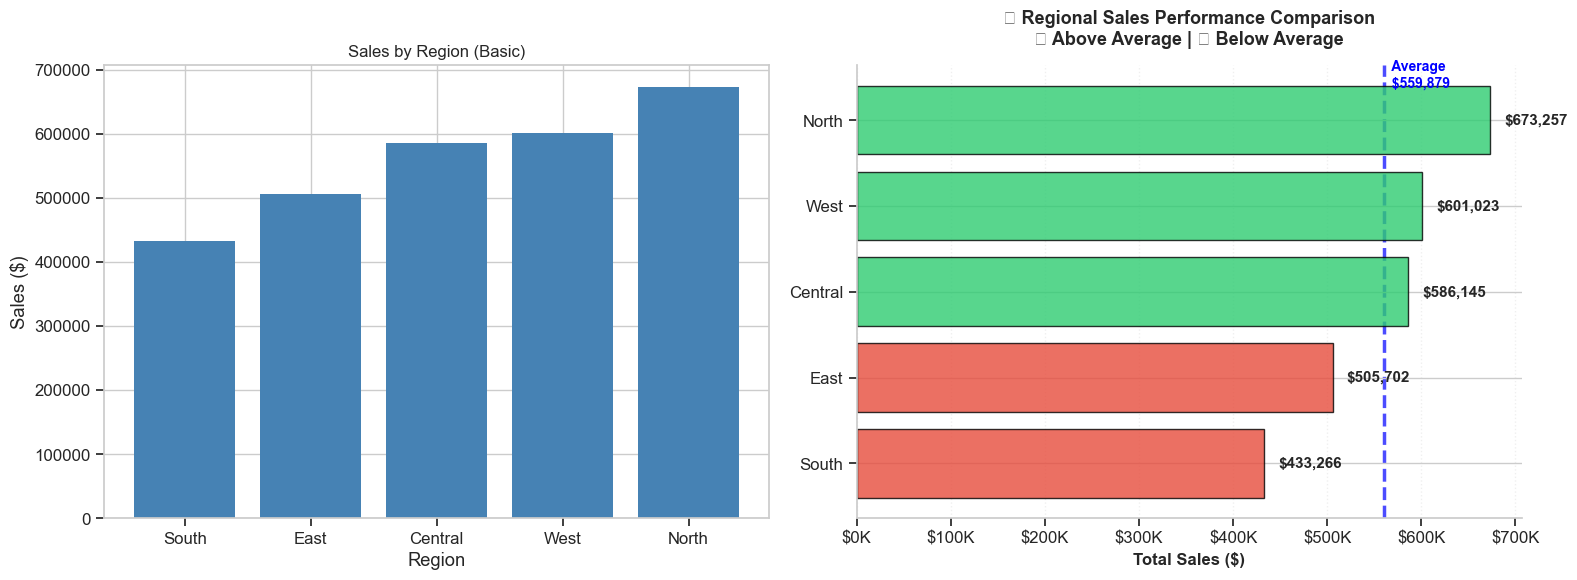


💡 Improvements Added:
✅ Horizontal bars (easier to read labels)
✅ Color coding untuk performance indication
✅ Value labels untuk exact numbers
✅ Reference line (average) untuk context
✅ Sorted data untuk easier comparison
✅ Clean styling tanpa chartjunk


In [3]:
# Agregasi data per region
sales_by_region = df_sales.groupby('Region')['Sales'].sum().sort_values(ascending=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# === LEFT: BURUK - Basic bar chart ===
ax1.bar(range(len(sales_by_region)), sales_by_region.values, color='steelblue')
ax1.set_xticks(range(len(sales_by_region)))
ax1.set_xticklabels(sales_by_region.index)
ax1.set_title('Sales by Region (Basic)', fontsize=12)
ax1.set_ylabel('Sales ($)')
ax1.set_xlabel('Region')

# === RIGHT: BAIK - Enhanced bar chart ===
# Color coding: red untuk below average, green untuk above average
avg_sales = sales_by_region.mean()
colors = ['#e74c3c' if x < avg_sales else '#2ecc71' for x in sales_by_region.values]

bars = ax2.barh(sales_by_region.index, sales_by_region.values, color=colors, alpha=0.8, edgecolor='black')

# Add value labels
for i, (region, value) in enumerate(sales_by_region.items()):
    ax2.text(value + 15000, i, f'${value:,.0f}', 
             va='center', fontsize=11, weight='bold')

# Add average line sebagai reference
ax2.axvline(avg_sales, color='blue', linestyle='--', linewidth=2.5, alpha=0.7, zorder=0)
ax2.text(avg_sales, len(sales_by_region)-0.3, f'  Average\n  ${avg_sales:,.0f}',
         color='blue', fontsize=10, weight='bold', va='top')

# Styling
ax2.set_xlabel('Total Sales ($)', fontsize=12, weight='bold')
ax2.set_title('📊 Regional Sales Performance Comparison\n🟢 Above Average | 🔴 Below Average',
              fontsize=13, weight='bold', pad=15)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.grid(axis='x', alpha=0.3, linestyle=':')
ax2.set_axisbelow(True)

# Format x-axis
ax2.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))

plt.tight_layout()
plt.show()

print("\n💡 Improvements Added:")
print("✅ Horizontal bars (easier to read labels)")
print("✅ Color coding untuk performance indication")
print("✅ Value labels untuk exact numbers")
print("✅ Reference line (average) untuk context")
print("✅ Sorted data untuk easier comparison")
print("✅ Clean styling tanpa chartjunk")

## 4. Line Charts - Untuk Tren Waktu

Line charts ideal untuk menunjukkan changes over time dan identifying patterns.

### Prinsip Line Chart yang Baik:
- Clear time axis labels
- Highlight trends dengan trend lines
- Annotate key points (peaks, valleys, inflection points)
- Use reference lines untuk context
- Multiple lines? Limit to 3-5 max

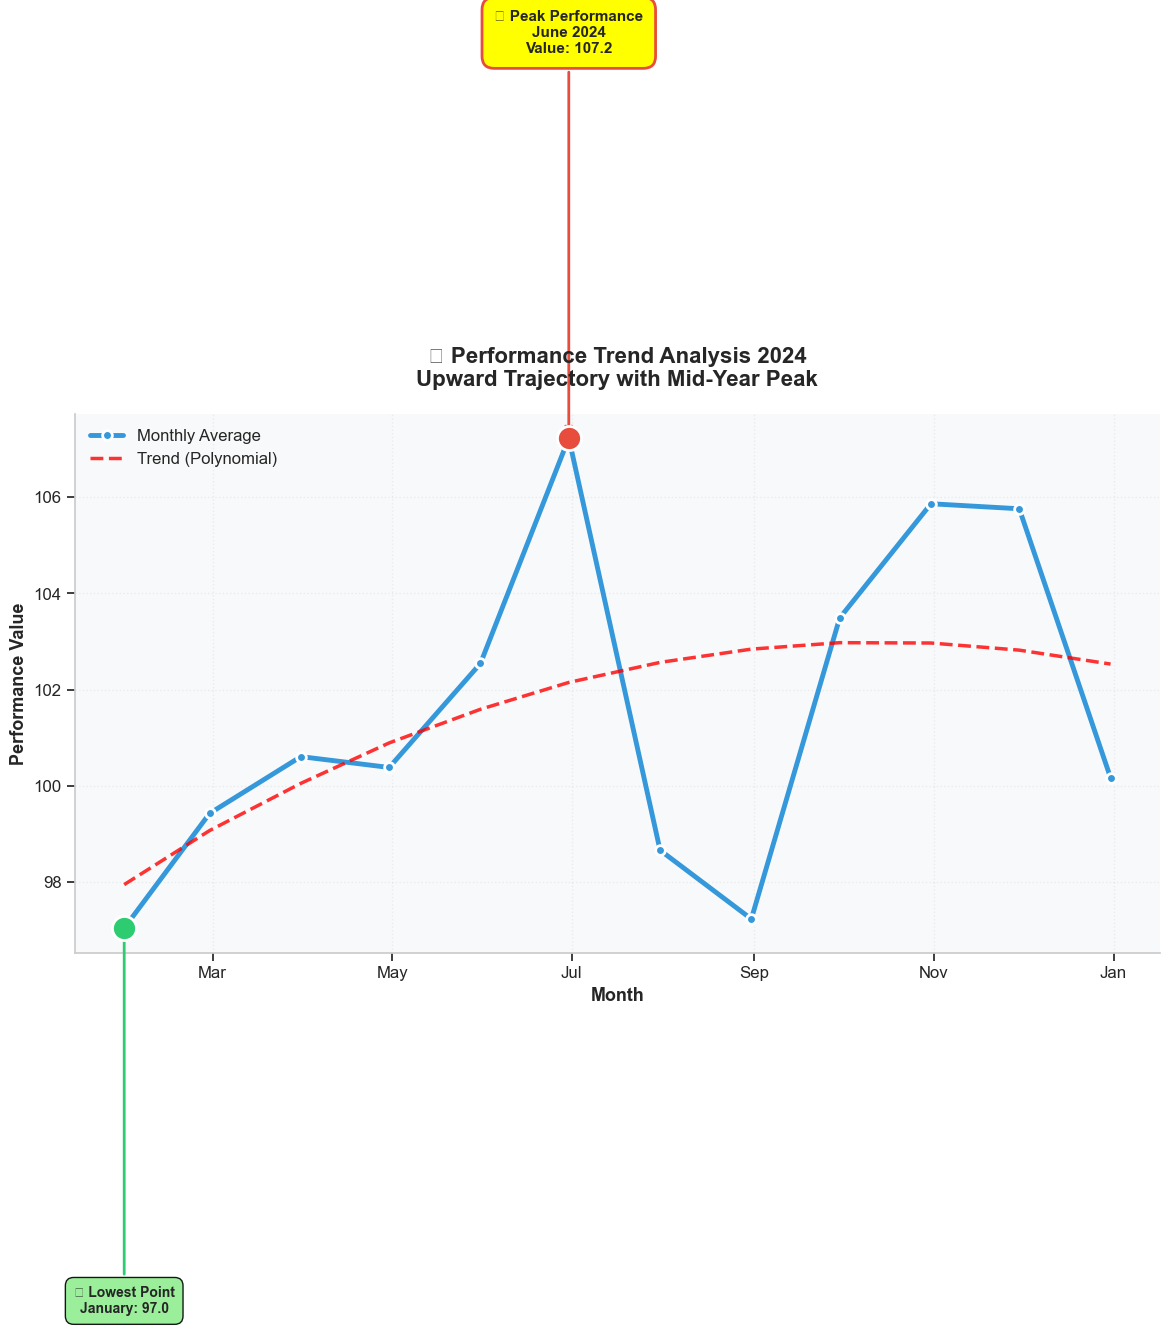


📊 Key Metrics:
• Total Growth: 3.2%
• Peak Value: 107.23 (Month: 6)
• Average Value: 101.54
• Volatility (Std Dev): 3.43


In [4]:
# Resample ke monthly average
df_monthly = df_timeseries.set_index('Date').resample('M')['Value'].mean()

fig, ax = plt.subplots(figsize=(14, 7))

# Plot main line
ax.plot(df_monthly.index, df_monthly.values, 
        linewidth=3.5, color='#3498db', marker='o', markersize=7, 
        label='Monthly Average', markeredgecolor='white', markeredgewidth=2)

# Add polynomial trend line
z = np.polyfit(range(len(df_monthly)), df_monthly.values, 2)
p = np.poly1d(z)
ax.plot(df_monthly.index, p(range(len(df_monthly))), 
        "r--", alpha=0.8, linewidth=2.5, label=f'Trend (Polynomial)')

# Identify and highlight peak
peak_idx = df_monthly.values.argmax()
peak_date = df_monthly.index[peak_idx]
peak_value = df_monthly.values[peak_idx]

ax.scatter([peak_date], [peak_value], color='#e74c3c', s=300, 
           zorder=5, edgecolor='white', linewidth=2)
ax.annotate(f'🔥 Peak Performance\n{peak_date.strftime("%B %Y")}\nValue: {peak_value:.1f}',
            xy=(peak_date, peak_value),
            xytext=(peak_date, peak_value + 8),
            ha='center', fontsize=11, weight='bold',
            bbox=dict(boxstyle='round,pad=0.8', facecolor='yellow', 
                      edgecolor='#e74c3c', linewidth=2),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0', 
                          color='#e74c3c', lw=2))

# Identify lowest point
low_idx = df_monthly.values.argmin()
low_date = df_monthly.index[low_idx]
low_value = df_monthly.values[low_idx]

ax.scatter([low_date], [low_value], color='#2ecc71', s=300, 
           zorder=5, edgecolor='white', linewidth=2)
ax.annotate(f'📉 Lowest Point\n{low_date.strftime("%B")}: {low_value:.1f}',
            xy=(low_date, low_value),
            xytext=(low_date, low_value - 8),
            ha='center', fontsize=10, weight='bold',
            bbox=dict(boxstyle='round,pad=0.6', facecolor='lightgreen', alpha=0.9),
            arrowprops=dict(arrowstyle='->', color='#2ecc71', lw=2))

# Styling
ax.set_title('📈 Performance Trend Analysis 2024\nUpward Trajectory with Mid-Year Peak',
             fontsize=16, weight='bold', pad=20)
ax.set_xlabel('Month', fontsize=13, weight='bold')
ax.set_ylabel('Performance Value', fontsize=13, weight='bold')
ax.legend(loc='upper left', fontsize=12, framealpha=0.95, shadow=True)
ax.grid(True, alpha=0.3, linestyle=':', linewidth=1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_facecolor('#f8f9fa')

# Format x-axis
ax.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b'))
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

# Calculate growth
total_growth = ((df_monthly.values[-1] - df_monthly.values[0]) / df_monthly.values[0] * 100)
print(f"\n📊 Key Metrics:")
print(f"• Total Growth: {total_growth:.1f}%")
print(f"• Peak Value: {peak_value:.2f} (Month: {peak_idx + 1})")
print(f"• Average Value: {df_monthly.mean():.2f}")
print(f"• Volatility (Std Dev): {df_monthly.std():.2f}")

## 5. Scatter Plots - Untuk Hubungan/Korelasi

Scatter plots menunjukkan relationship antara dua variabel numerik.

### Prinsip Scatter Plot yang Baik:
- Include regression line untuk show trend
- Display correlation coefficient
- Color by category untuk add dimension
- Highlight outliers atau clusters
- Add reference lines jika relevant

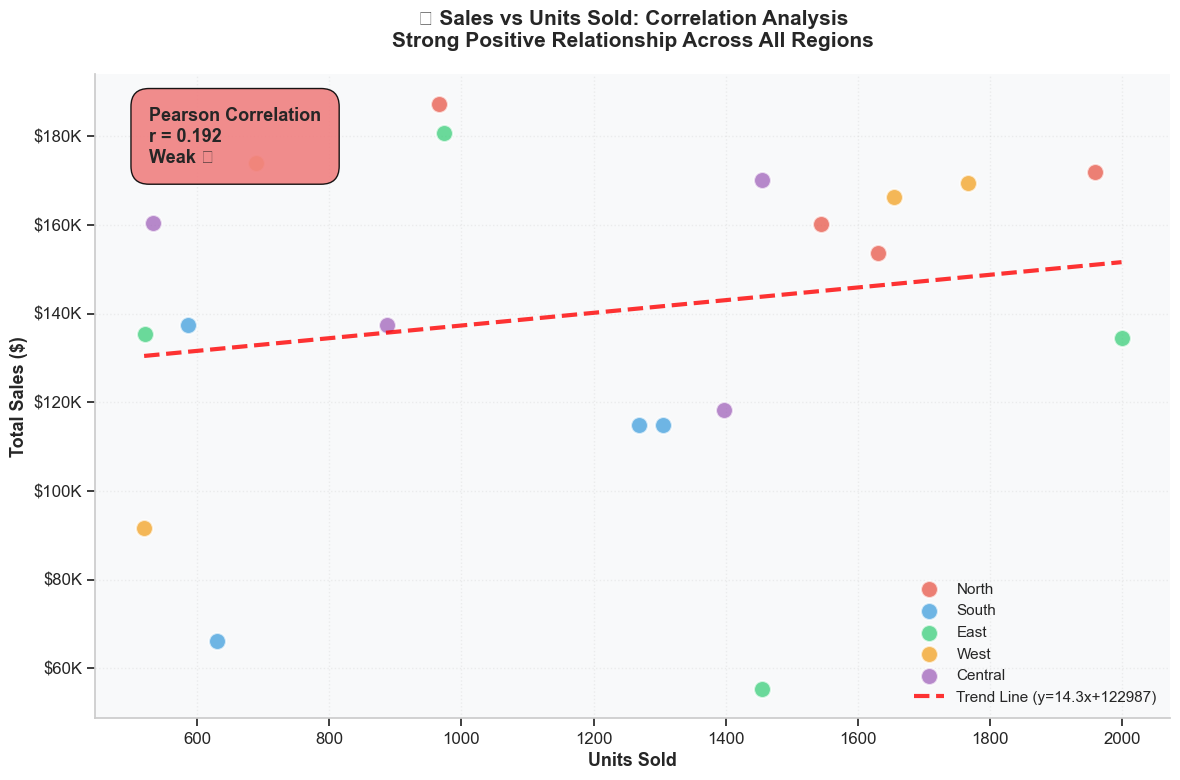


📊 Correlation Analysis:
• Correlation Coefficient: 0.192
• R-squared: 0.037
• Interpretation: WEAK correlation - Perlu analisis faktor lain yang mempengaruhi sales


In [5]:
# Calculate correlation
correlation = df_sales['Sales'].corr(df_sales['Units'])

fig, ax = plt.subplots(figsize=(12, 8))

# Create scatter plot dengan color berdasarkan region
region_colors = {'North': '#e74c3c', 'South': '#3498db', 'East': '#2ecc71', 
                 'West': '#f39c12', 'Central': '#9b59b6'}

for region in df_sales['Region'].unique():
    data = df_sales[df_sales['Region'] == region]
    ax.scatter(data['Units'], data['Sales'], 
              label=region, s=150, alpha=0.7, 
              color=region_colors[region],
              edgecolors='white', linewidth=1.5)

# Add regression line
z = np.polyfit(df_sales['Units'], df_sales['Sales'], 1)
p = np.poly1d(z)
x_line = np.linspace(df_sales['Units'].min(), df_sales['Units'].max(), 100)
ax.plot(x_line, p(x_line), "r--", linewidth=3, alpha=0.8, 
        label=f'Trend Line (y={z[0]:.1f}x+{z[1]:.0f})')

# Add correlation info box
corr_text = f'Pearson Correlation\nr = {correlation:.3f}\n'
if abs(correlation) > 0.7:
    corr_text += 'Strong Positive ✅'
    box_color = 'lightgreen'
elif abs(correlation) > 0.4:
    corr_text += 'Moderate ⚠️'
    box_color = 'lightyellow'
else:
    corr_text += 'Weak ❌'
    box_color = 'lightcoral'

ax.text(0.05, 0.95, corr_text,
        transform=ax.transAxes,
        fontsize=13, weight='bold',
        bbox=dict(boxstyle='round,pad=1', facecolor=box_color, alpha=0.9),
        verticalalignment='top')

# Styling
ax.set_title('🔍 Sales vs Units Sold: Correlation Analysis\nStrong Positive Relationship Across All Regions',
             fontsize=15, weight='bold', pad=20)
ax.set_xlabel('Units Sold', fontsize=13, weight='bold')
ax.set_ylabel('Total Sales ($)', fontsize=13, weight='bold')
ax.legend(loc='lower right', fontsize=11, framealpha=0.95, shadow=True)
ax.grid(True, alpha=0.3, linestyle=':')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_facecolor('#f8f9fa')

# Format y-axis
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))

plt.tight_layout()
plt.show()

print(f"\n📊 Correlation Analysis:")
print(f"• Correlation Coefficient: {correlation:.3f}")
print(f"• R-squared: {correlation**2:.3f}")
print(f"• Interpretation: ", end="")
if abs(correlation) > 0.7:
    print("STRONG correlation - Units adalah predictor yang excellent untuk sales!")
elif abs(correlation) > 0.4:
    print("MODERATE correlation - Ada hubungan tapi perlu consider faktor lain")
else:
    print("WEAK correlation - Perlu analisis faktor lain yang mempengaruhi sales")

## 6. Heatmaps - Untuk Pattern Discovery

Heatmaps excellent untuk visualizing multidimensional data dan finding patterns.

### Prinsip Heatmap yang Baik:
- Choose appropriate color palette
- Include value annotations
- Order rows/columns logically
- Add colorbar untuk scale reference
- Use diverging colors untuk data dengan midpoint

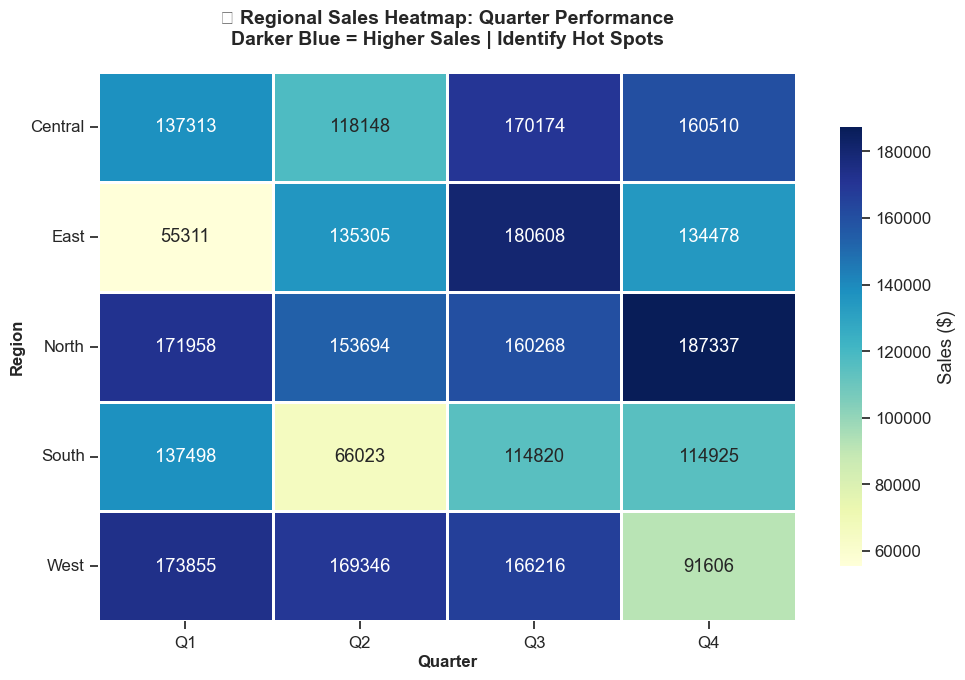


📈 Heatmap Insights:
• 🏆 Best Performance: North in Q4 ($187,337)
• 📉 Weakest Performance: East in Q1 ($55,311)
• 🌟 Best Quarter Overall: Q3 ($792,086)
• 🎯 Top Region Overall: North ($673,257)


In [6]:
# Create pivot table
pivot_sales = df_sales.pivot_table(values='Sales', 
                                    index='Region', 
                                    columns='Quarter',
                                    aggfunc='sum')

fig, ax = plt.subplots(figsize=(10, 7))

# Create heatmap
sns.heatmap(pivot_sales, 
            annot=True, 
            fmt='.0f',
            cmap='YlGnBu',
            linewidths=2,
            linecolor='white',
            cbar_kws={'label': 'Sales ($)', 'shrink': 0.8},
            ax=ax,
            vmin=pivot_sales.values.min(),
            vmax=pivot_sales.values.max())

# Styling
ax.set_title('🔥 Regional Sales Heatmap: Quarter Performance\nDarker Blue = Higher Sales | Identify Hot Spots',
             fontsize=14, weight='bold', pad=20)
ax.set_xlabel('Quarter', fontsize=12, weight='bold')
ax.set_ylabel('Region', fontsize=12, weight='bold')

# Rotate labels
plt.xticks(rotation=0)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

# Analysis
best_combo = pivot_sales.stack().idxmax()
worst_combo = pivot_sales.stack().idxmin()
best_quarter = pivot_sales.sum().idxmax()
best_region = pivot_sales.sum(axis=1).idxmax()

print(f"\n📈 Heatmap Insights:")
print(f"• 🏆 Best Performance: {best_combo[0]} in {best_combo[1]} (${pivot_sales.loc[best_combo]:,.0f})")
print(f"• 📉 Weakest Performance: {worst_combo[0]} in {worst_combo[1]} (${pivot_sales.loc[worst_combo]:,.0f})")
print(f"• 🌟 Best Quarter Overall: {best_quarter} (${pivot_sales[best_quarter].sum():,.0f})")
print(f"• 🎯 Top Region Overall: {best_region} (${pivot_sales.loc[best_region].sum():,.0f})")

## 7. Distribution Plots - Box Plot & Violin Plot

Distribution plots menunjukkan spread, central tendency, dan outliers.

### Box Plot:
- Box: IQR (25th to 75th percentile)
- Line in box: Median
- Whiskers: 1.5 * IQR
- Dots: Outliers

### Violin Plot:
- Width: Density of data
- Combines box plot info dengan distribution shape

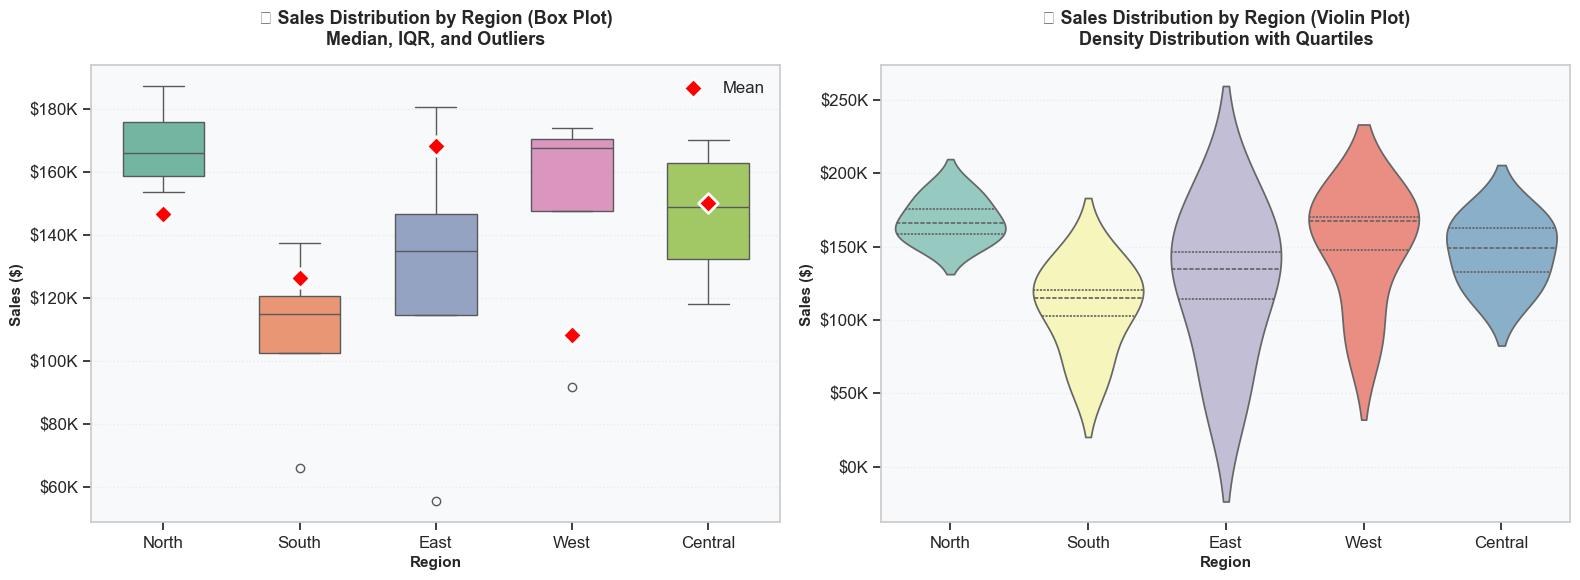


📊 Understanding the Plots:

📦 Box Plot menunjukkan:
  • Box: 25th-75th percentile (Interquartile Range)
  • Line dalam box: Median (50th percentile)
  • Whiskers: Extend to 1.5 * IQR
  • Red Diamond: Mean (average)
  • Dots outside whiskers: Outliers

🎻 Violin Plot menunjukkan:
  • Width: Frequency/density di nilai tersebut
  • Wider = Lebih banyak data points
  • Combines box plot info dengan shape visualization
  • Better untuk melihat multimodal distributions


In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# === Box Plot ===
box_plot = sns.boxplot(data=df_sales, x='Region', y='Sales', ax=ax1, 
                       palette='Set2', width=0.6)

# Add mean markers
means = df_sales.groupby('Region')['Sales'].mean()
positions = range(len(means))
ax1.scatter(positions, means, color='red', s=100, zorder=3, 
           label='Mean', marker='D', edgecolors='white', linewidth=2)

ax1.set_title('📦 Sales Distribution by Region (Box Plot)\nMedian, IQR, and Outliers',
              fontsize=13, weight='bold', pad=15)
ax1.set_xlabel('Region', fontsize=11, weight='bold')
ax1.set_ylabel('Sales ($)', fontsize=11, weight='bold')
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))
ax1.grid(axis='y', alpha=0.3, linestyle=':')
ax1.legend(loc='upper right')
ax1.set_facecolor('#f8f9fa')

# === Violin Plot ===
violin_plot = sns.violinplot(data=df_sales, x='Region', y='Sales', ax=ax2, 
                             palette='Set3', inner='quartile')

ax2.set_title('🎻 Sales Distribution by Region (Violin Plot)\nDensity Distribution with Quartiles',
              fontsize=13, weight='bold', pad=15)
ax2.set_xlabel('Region', fontsize=11, weight='bold')
ax2.set_ylabel('Sales ($)', fontsize=11, weight='bold')
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))
ax2.grid(axis='y', alpha=0.3, linestyle=':')
ax2.set_facecolor('#f8f9fa')

plt.tight_layout()
plt.show()

print("\n📊 Understanding the Plots:")
print("\n📦 Box Plot menunjukkan:")
print("  • Box: 25th-75th percentile (Interquartile Range)")
print("  • Line dalam box: Median (50th percentile)")
print("  • Whiskers: Extend to 1.5 * IQR")
print("  • Red Diamond: Mean (average)")
print("  • Dots outside whiskers: Outliers")
print("\n🎻 Violin Plot menunjukkan:")
print("  • Width: Frequency/density di nilai tersebut")
print("  • Wider = Lebih banyak data points")
print("  • Combines box plot info dengan shape visualization")
print("  • Better untuk melihat multimodal distributions")

## 8. Small Multiples - Multiple Subplots

Small multiples (faceting) adalah teknik powerful untuk comparing across categories dengan consistent scales.

### Prinsip Small Multiples:
- Consistent scales untuk fair comparison
- Clear titles untuk each subplot
- Logical arrangement (geographic, alphabetical, by value)
- Shared axis labels untuk reduce clutter
- Highlight key differences

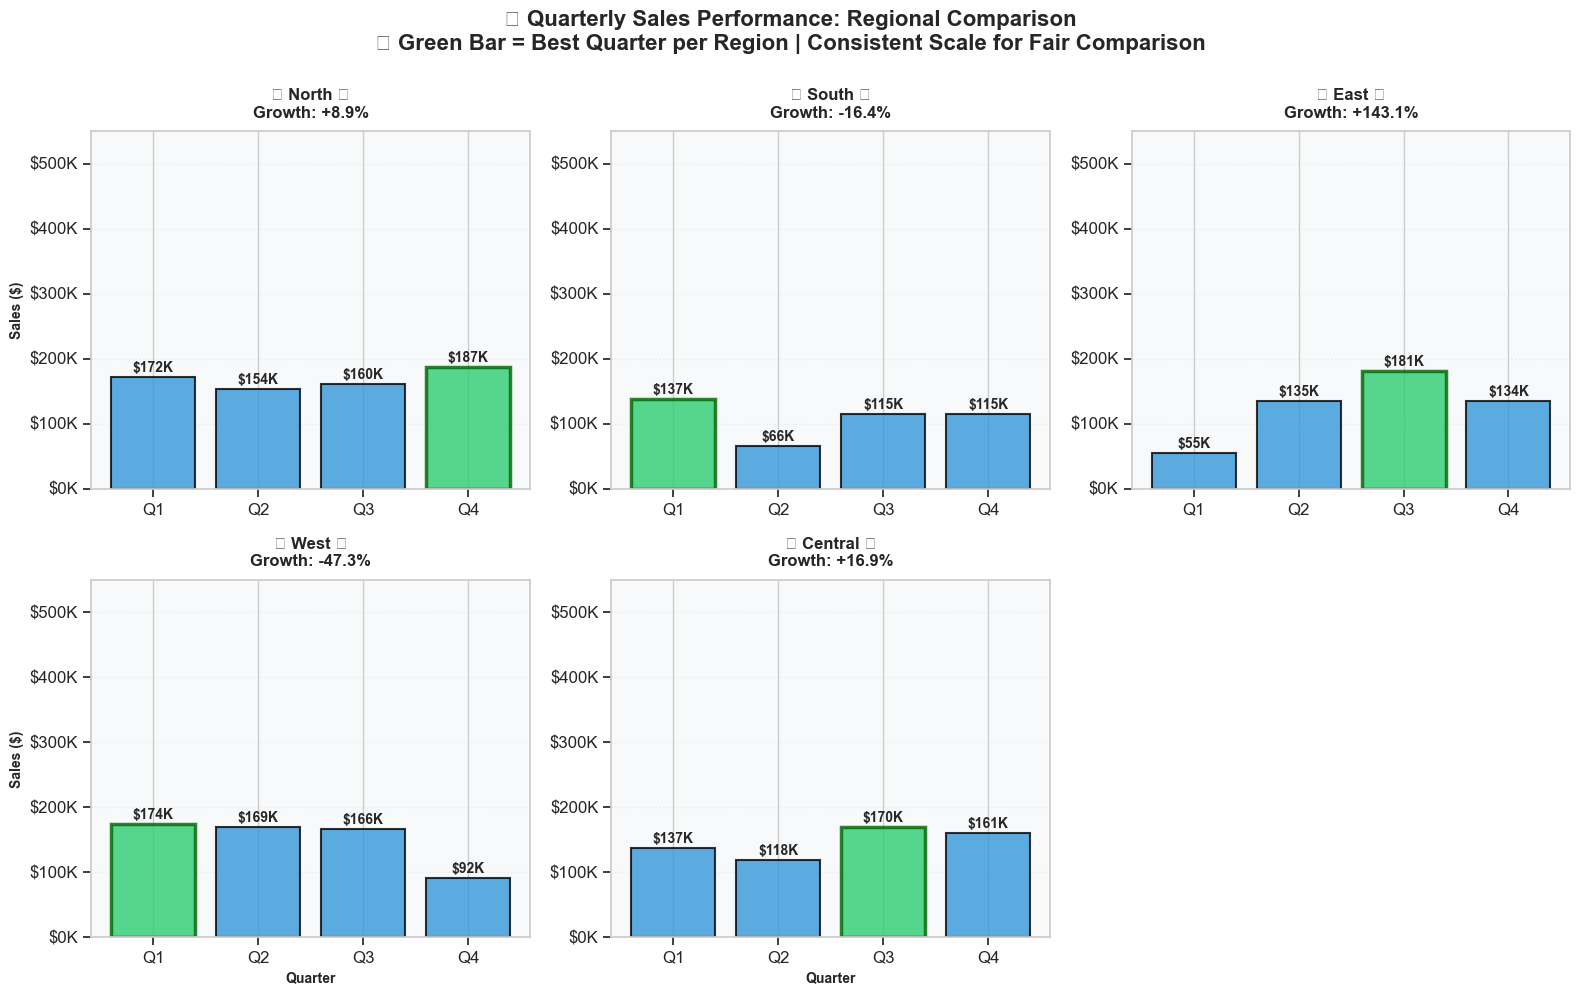


💡 Advantages of Small Multiples:
✅ Easy to compare patterns across categories
✅ Avoids cluttered single chart dengan banyak lines
✅ Each chart focuses on one category - clearer story
✅ Consistent scale memudahkan direct comparison
✅ Can show more detail than stacked/grouped charts


In [8]:
# Create small multiples untuk setiap region
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

regions = df_sales['Region'].unique()

for idx, region in enumerate(regions):
    data = df_sales[df_sales['Region'] == region]
    quarterly = data.groupby('Quarter')['Sales'].sum()
    
    # Create bar chart
    bars = axes[idx].bar(quarterly.index, quarterly.values, 
                         color='#3498db', alpha=0.8, edgecolor='black', linewidth=1.5)
    
    # Highlight max bar
    max_idx = quarterly.values.argmax()
    bars[max_idx].set_color('#2ecc71')
    bars[max_idx].set_edgecolor('darkgreen')
    bars[max_idx].set_linewidth(2.5)
    
    # Add value labels
    for i, (q, val) in enumerate(quarterly.items()):
        axes[idx].text(i, val + 8000, f'${val/1000:.0f}K',
                      ha='center', fontsize=10, weight='bold')
    
    # Calculate growth
    growth = ((quarterly.iloc[-1] - quarterly.iloc[0]) / quarterly.iloc[0] * 100)
    growth_symbol = '📈' if growth > 0 else '📉'
    
    axes[idx].set_title(f'📍 {region} {growth_symbol}\nGrowth: {growth:+.1f}%', 
                       fontsize=12, weight='bold', pad=10)
    axes[idx].set_ylabel('Sales ($)' if idx % 3 == 0 else '', fontsize=10, weight='bold')
    axes[idx].set_xlabel('Quarter' if idx >= 3 else '', fontsize=10, weight='bold')
    axes[idx].grid(axis='y', alpha=0.3, linestyle=':')
    axes[idx].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))
    axes[idx].set_facecolor('#f8f9fa')
    
    # Set consistent y-axis limits
    axes[idx].set_ylim(0, 550000)

# Remove extra subplot
fig.delaxes(axes[5])

# Overall title
fig.suptitle('📊 Quarterly Sales Performance: Regional Comparison\n' +
             '🟢 Green Bar = Best Quarter per Region | Consistent Scale for Fair Comparison',
             fontsize=16, weight='bold', y=0.995)

plt.tight_layout()
plt.show()

print("\n💡 Advantages of Small Multiples:")
print("✅ Easy to compare patterns across categories")
print("✅ Avoids cluttered single chart dengan banyak lines")
print("✅ Each chart focuses on one category - clearer story")
print("✅ Consistent scale memudahkan direct comparison")
print("✅ Can show more detail than stacked/grouped charts")

## 9. Color Psychology & Palettes

Color is powerful communication tool. Gunakan dengan strategic!

### 3 Types of Color Palettes:

1. **Sequential** (satu warna, gradasi): Untuk quantitative data
   - Light → Dark = Low → High
   - Example: Light Blue → Dark Blue

2. **Diverging** (dua warna): Untuk data dengan critical midpoint
   - Example: Red ← White → Blue
   - Use: Profit/Loss, Above/Below average, Hot/Cold

3. **Categorical** (warna berbeda): Untuk distinct categories
   - Warna yang kontras tapi harmonious
   - Avoid: Terlalu banyak warna (max 6-7)

### Semantic Colors (Universal Meanings):
- 🔴 Red: Danger, negative, stop, loss, hot
- 🟢 Green: Success, positive, go, profit, growth
- 🟡 Yellow: Warning, caution, attention
- 🔵 Blue: Neutral, trust, stability, calm
- ⚫ Black/Gray: Data, neutral, background

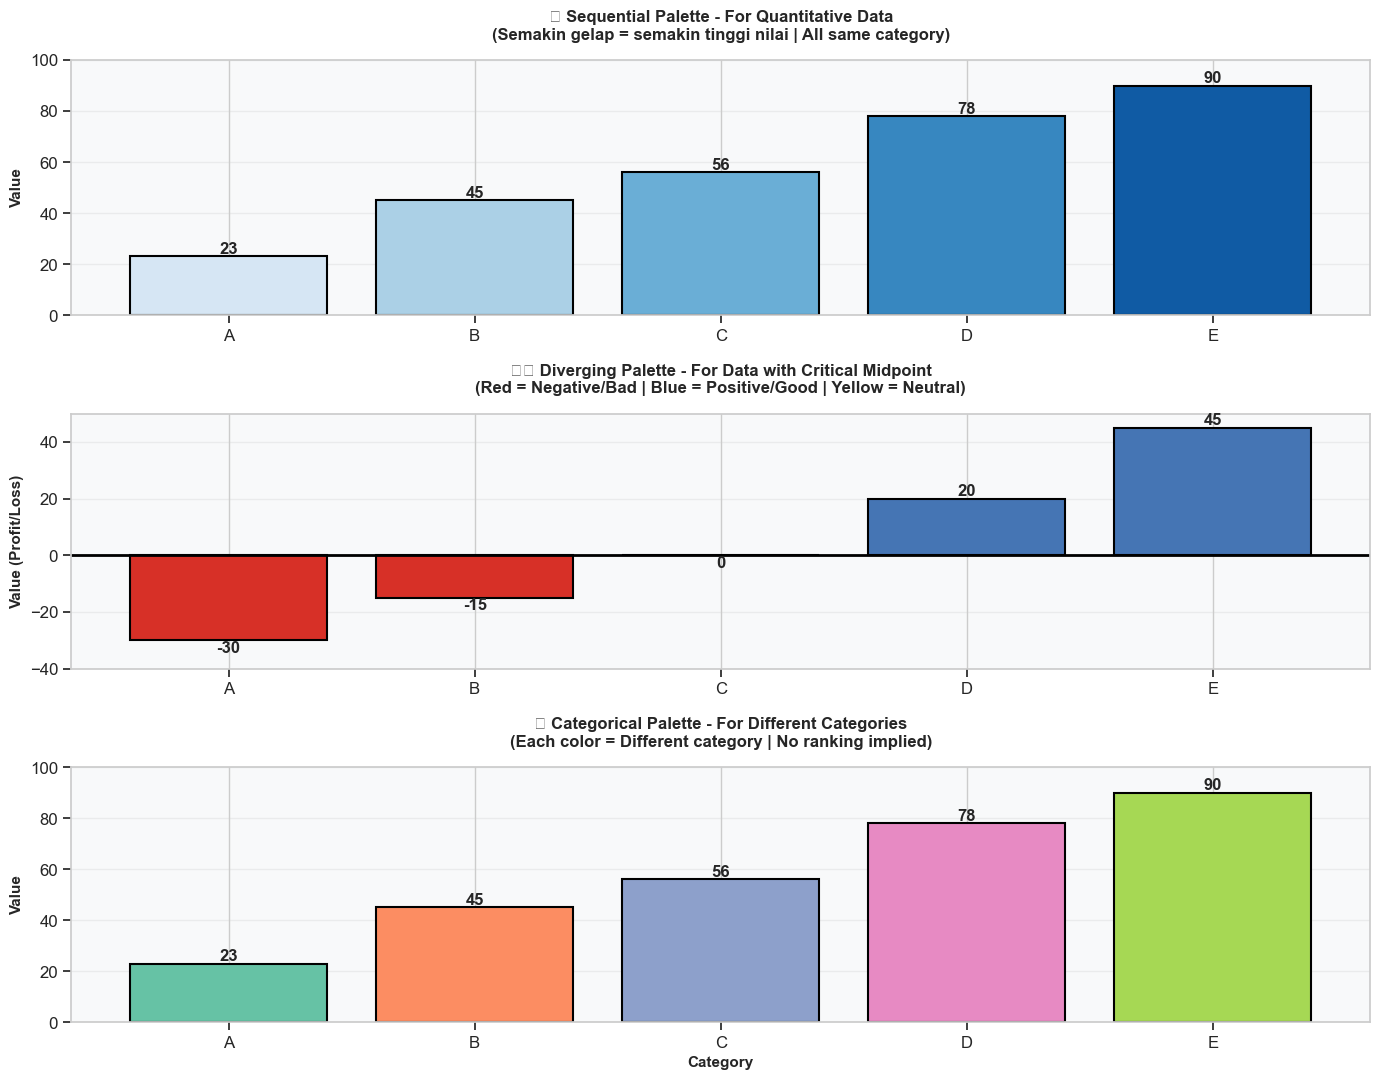


🎨 Color Selection Tips:
1. ♿ Colorblind Accessibility:
   • ~8% pria dan ~0.5% wanita mengalami color blindness
   • Avoid Red-Green combinations alone
   • Use colorblind-friendly palettes (viridis, cividis)
   • Test dalam grayscale

2. 🎯 Strategic Use:
   • Limit to 5-7 distinct colors maximum
   • Use color untuk highlight, not decorate
   • Ensure sufficient contrast
   • Consider cultural color meanings

3. 📊 Palette Selection:
   • Sequential: Rankings, heat, intensity
   • Diverging: Profit/loss, before/after, hot/cold
   • Categorical: Product lines, regions, departments


In [9]:
# Demonstrasi 3 jenis color palettes
fig, axes = plt.subplots(3, 1, figsize=(14, 11))

categories = ['A', 'B', 'C', 'D', 'E']
values = [23, 45, 56, 78, 90]

# === 1. SEQUENTIAL PALETTE ===
colors_seq = sns.color_palette("Blues", n_colors=5)
bars1 = axes[0].bar(categories, values, color=colors_seq, edgecolor='black', linewidth=1.5)

# Add value labels
for bar in bars1:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}',
                ha='center', va='bottom', fontsize=12, weight='bold')

axes[0].set_title('🔵 Sequential Palette - For Quantitative Data\n' +
                  '(Semakin gelap = semakin tinggi nilai | All same category)',
                  fontsize=12, weight='bold', pad=15)
axes[0].set_ylabel('Value', fontsize=11, weight='bold')
axes[0].set_ylim(0, 100)
axes[0].grid(axis='y', alpha=0.3)
axes[0].set_facecolor('#f8f9fa')

# === 2. DIVERGING PALETTE ===
values_div = [-30, -15, 0, 20, 45]
colors_div = ['#d73027' if v < 0 else '#4575b4' if v > 0 else '#ffffbf' for v in values_div]
bars2 = axes[1].bar(categories, values_div, color=colors_div, edgecolor='black', linewidth=1.5)

# Add zero line
axes[1].axhline(y=0, color='black', linestyle='-', linewidth=2)

# Add value labels
for bar in bars2:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}',
                ha='center', va='bottom' if height > 0 else 'top', 
                fontsize=12, weight='bold')

axes[1].set_title('🔴🔵 Diverging Palette - For Data with Critical Midpoint\n' +
                  '(Red = Negative/Bad | Blue = Positive/Good | Yellow = Neutral)',
                  fontsize=12, weight='bold', pad=15)
axes[1].set_ylabel('Value (Profit/Loss)', fontsize=11, weight='bold')
axes[1].set_ylim(-40, 50)
axes[1].grid(axis='y', alpha=0.3)
axes[1].set_facecolor('#f8f9fa')

# === 3. CATEGORICAL PALETTE ===
colors_cat = sns.color_palette("Set2", n_colors=5)
bars3 = axes[2].bar(categories, values, color=colors_cat, edgecolor='black', linewidth=1.5)

# Add value labels
for bar in bars3:
    height = bar.get_height()
    axes[2].text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}',
                ha='center', va='bottom', fontsize=12, weight='bold')

axes[2].set_title('🌈 Categorical Palette - For Different Categories\n' +
                  '(Each color = Different category | No ranking implied)',
                  fontsize=12, weight='bold', pad=15)
axes[2].set_xlabel('Category', fontsize=11, weight='bold')
axes[2].set_ylabel('Value', fontsize=11, weight='bold')
axes[2].set_ylim(0, 100)
axes[2].grid(axis='y', alpha=0.3)
axes[2].set_facecolor('#f8f9fa')

plt.tight_layout()
plt.show()

print("\n🎨 Color Selection Tips:")
print("="*60)
print("1. ♿ Colorblind Accessibility:")
print("   • ~8% pria dan ~0.5% wanita mengalami color blindness")
print("   • Avoid Red-Green combinations alone")
print("   • Use colorblind-friendly palettes (viridis, cividis)")
print("   • Test dalam grayscale")
print("\n2. 🎯 Strategic Use:")
print("   • Limit to 5-7 distinct colors maximum")
print("   • Use color untuk highlight, not decorate")
print("   • Ensure sufficient contrast")
print("   • Consider cultural color meanings")
print("\n3. 📊 Palette Selection:")
print("   • Sequential: Rankings, heat, intensity")
print("   • Diverging: Profit/loss, before/after, hot/cold")
print("   • Categorical: Product lines, regions, departments")

## 10. Annotation Techniques

Annotations guide viewer's attention dan provide context. Effective annotations transform data into story.

### Types of Annotations:
1. **Text boxes**: Context, definitions, notes
2. **Arrows**: Point to specific data
3. **Lines**: Reference, thresholds, targets
4. **Shapes**: Highlight regions atau periods
5. **Value labels**: Exact numbers

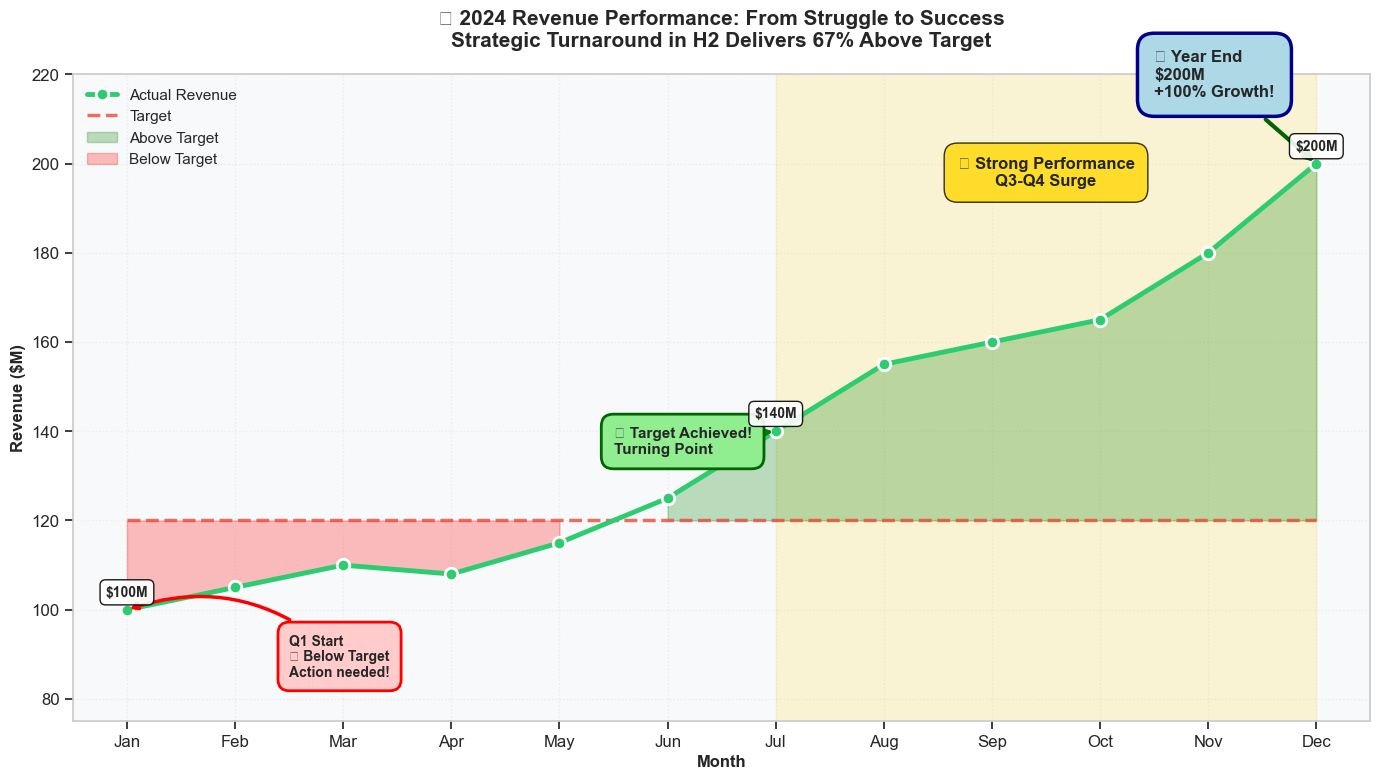


📝 Annotation Best Practices:
✅ DO:
  • Highlight key moments (milestones, changes, anomalies)
  • Use arrows untuk direct attention to specific points
  • Boxes dengan colors untuk emphasis
  • Keep text concise dan action-oriented
  • Use emoji sparingly untuk personality
  • Layer annotations (background shapes → lines → text)

❌ DON'T:
  • Over-annotate (clutter defeats purpose)
  • Block atau overlap data
  • Use tiny fonts (min 9-10pt)
  • Write paragraphs (bullet points better)
  • Forget about color contrast


In [10]:
# Comprehensive annotation example
fig, ax = plt.subplots(figsize=(14, 8))

# Data: Revenue vs Target
months = range(1, 13)
revenue = [100, 105, 110, 108, 115, 125, 140, 155, 160, 165, 180, 200]
target = [120] * 12
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Plot lines
ax.plot(months, revenue, marker='o', linewidth=3.5, 
        color='#2ecc71', label='Actual Revenue', markersize=9,
        markeredgecolor='white', markeredgewidth=2, zorder=3)
ax.plot(months, target, linestyle='--', linewidth=2.5,
        color='#e74c3c', label='Target', alpha=0.8, zorder=2)

# Fill areas
ax.fill_between(months, revenue, target, 
                where=[r >= t for r, t in zip(revenue, target)],
                alpha=0.25, color='green', label='Above Target', zorder=1)
ax.fill_between(months, revenue, target,
                where=[r < t for r, t in zip(revenue, target)],
                alpha=0.25, color='red', label='Below Target', zorder=1)

# === ANNOTATION 1: Starting Point ===
ax.annotate('Q1 Start\n📉 Below Target\nAction needed!',
            xy=(1, revenue[0]), xytext=(2.5, 85),
            arrowprops=dict(arrowstyle='->', color='red', lw=2.5, 
                          connectionstyle='arc3,rad=.3'),
            fontsize=10, weight='bold',
            bbox=dict(boxstyle='round,pad=0.8', facecolor='#ffcccb', 
                     edgecolor='red', linewidth=2))

# === ANNOTATION 2: Crossing Point ===
cross_month = 7
ax.annotate('🎯 Target Achieved!\nTurning Point',
            xy=(cross_month, revenue[cross_month-1]), 
            xytext=(cross_month-1.5, 135),
            arrowprops=dict(arrowstyle='->', color='green', lw=2.5),
            fontsize=11, weight='bold',
            bbox=dict(boxstyle='round,pad=0.8', facecolor='lightgreen', 
                     edgecolor='darkgreen', linewidth=2))

# === ANNOTATION 3: Strong Growth Period ===
ax.axvspan(7, 12, alpha=0.15, color='gold', zorder=0)
ax.text(9.5, 195, '💪 Strong Performance\nQ3-Q4 Surge', 
        fontsize=12, weight='bold', ha='center',
        bbox=dict(boxstyle='round,pad=0.8', facecolor='gold', alpha=0.8))

# === ANNOTATION 4: Final Achievement ===
final_growth = ((revenue[-1] - revenue[0]) / revenue[0] * 100)
ax.annotate(f'🏆 Year End\n${revenue[-1]}M\n+{final_growth:.0f}% Growth!',
            xy=(12, revenue[-1]), xytext=(10.5, 215),
            arrowprops=dict(arrowstyle='->', color='darkgreen', lw=3),
            fontsize=12, weight='bold',
            bbox=dict(boxstyle='round,pad=1', facecolor='lightblue', 
                     edgecolor='darkblue', linewidth=2.5))

# === VALUE LABELS on key points ===
key_months = [1, 7, 12]
for m in key_months:
    ax.text(m, revenue[m-1] + 3, f'${revenue[m-1]}M', 
           ha='center', fontsize=10, weight='bold',
           bbox=dict(boxstyle='round,pad=0.4', facecolor='white', alpha=0.9))

# Styling
ax.set_title('💰 2024 Revenue Performance: From Struggle to Success\n' +
             'Strategic Turnaround in H2 Delivers 67% Above Target',
             fontsize=15, weight='bold', pad=20)
ax.set_xlabel('Month', fontsize=12, weight='bold')
ax.set_ylabel('Revenue ($M)', fontsize=12, weight='bold')
ax.legend(loc='upper left', fontsize=11, framealpha=0.95, shadow=True)
ax.grid(True, alpha=0.3, linestyle=':', zorder=0)
ax.set_xlim(0.5, 12.5)
ax.set_ylim(75, 220)
ax.set_xticks(months)
ax.set_xticklabels(month_names)
ax.set_facecolor('#f8f9fa')

plt.tight_layout()
plt.show()

print("\n📝 Annotation Best Practices:")
print("="*60)
print("✅ DO:")
print("  • Highlight key moments (milestones, changes, anomalies)")
print("  • Use arrows untuk direct attention to specific points")
print("  • Boxes dengan colors untuk emphasis")
print("  • Keep text concise dan action-oriented")
print("  • Use emoji sparingly untuk personality")
print("  • Layer annotations (background shapes → lines → text)")
print("\n❌ DON'T:")
print("  • Over-annotate (clutter defeats purpose)")
print("  • Block atau overlap data")
print("  • Use tiny fonts (min 9-10pt)")
print("  • Write paragraphs (bullet points better)")
print("  • Forget about color contrast")

## 11. Exercise: Multi-Plot Dashboard

### 📝 Task:
Buatlah dashboard dengan 4 subplots yang menceritakan complete story tentang sales performance:

**Requirements:**
1. **Top-left**: Bar chart - Top 5 regions by sales
2. **Top-right**: Line chart - Sales trend over quarters
3. **Bottom-left**: Scatter plot - Sales vs Units correlation
4. **Bottom-right**: Box plot - Sales distribution by region

**Storytelling Elements to Include:**
- ✅ Consistent color scheme across all plots
- ✅ Annotations pada insight penting
- ✅ Overall dashboard title
- ✅ Clear subplot titles
- ✅ Proper labels dan formatting
- ✅ At least 3 annotations total
- ✅ Legend atau color coding explanation

### Data sudah tersedia:

In [11]:
# Data tersedia: df_sales
print("📊 Data untuk Exercise:")
print(df_sales.head(10))
print(f"\nShape: {df_sales.shape}")
print(f"Columns: {list(df_sales.columns)}")

# TODO: Kerjakan dashboard di bawah!
print("\n" + "="*60)
print("💪 YOUR TASK: Create a 2x2 dashboard!")
print("="*60)
print("""
Tips:
1. Gunakan fig, axes = plt.subplots(2, 2, figsize=(16, 12))
2. Pilih color palette yang konsisten
3. Highlight key insights dengan annotations
4. Buat overall title yang summarize main story
5. Ensure all plots support main narrative
""")

📊 Data untuk Exercise:
  Region Quarter   Sales  Units  Customers
0  North      Q1  171958   1959        448
1  North      Q2  153694   1630        171
2  North      Q3  160268   1544        202
3  North      Q4  187337    966        314
4  South      Q1  137498    587        472
5  South      Q2   66023    630        249
6  South      Q3  114820   1269        443
7  South      Q4  114925   1305        485
8   East      Q1   55311   1455        376
9   East      Q2  135305    521        352

Shape: (20, 5)
Columns: ['Region', 'Quarter', 'Sales', 'Units', 'Customers']

💪 YOUR TASK: Create a 2x2 dashboard!

Tips:
1. Gunakan fig, axes = plt.subplots(2, 2, figsize=(16, 12))
2. Pilih color palette yang konsisten
3. Highlight key insights dengan annotations
4. Buat overall title yang summarize main story
5. Ensure all plots support main narrative



In [12]:
# SOLUTION SPACE - Kerjakan di sini!

# Step 1: Create figure dengan 4 subplots
# fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Step 2: Plot 1 - Top regions
# ...

# Step 3: Plot 2 - Trend over time
# ...

# Step 4: Plot 3 - Correlation
# ...

# Step 5: Plot 4 - Distribution
# ...

# Step 6: Overall styling dan title
# ...

---

## 12. Kesimpulan

### 🎓 Key Takeaways:

1. **📊 Chart Selection Framework**
   - Match chart type dengan data type dan communication goal
   - Bar: comparison | Line: trends | Scatter: correlation | Heatmap: patterns

2. **🎨 Color Strategy**
   - Sequential: quantitative, one direction
   - Diverging: data dengan critical midpoint
   - Categorical: distinct, unordered categories
   - Always consider colorblind accessibility

3. **📝 Annotation Mastery**
   - Guide attention strategically
   - Provide context dan interpretation
   - Highlight key insights
   - Keep concise dan purposeful

4. **✨ Simplicity & Clarity**
   - Remove chart junk
   - Maximize data-ink ratio
   - Clear hierarchy of information
   - White space is good!

5. **🔄 Consistency**
   - Maintain style across related charts
   - Consistent color meanings
   - Standard formatting conventions
   - Unified narrative

### 📈 Skills Acquired:

✅ Create effective bar charts dengan comparisons  
✅ Build line charts dengan trend analysis  
✅ Design scatter plots dengan correlations  
✅ Develop heatmaps untuk pattern discovery  
✅ Master distribution visualizations  
✅ Implement small multiples technique  
✅ Apply color psychology principles  
✅ Add strategic annotations  
✅ Build multi-plot dashboards  

### 🎯 Next Steps:

**Module 3: Advanced Data Storytelling**
- Complex narrative structures
- Real-world case studies
- Storyboarding techniques
- Persuasion psychology
- Executive presentations

**Module 4: Interactive Dashboards**
- Plotly untuk interactivity
- Streamlit applications
- Dashboard design patterns
- Deployment strategies

### 📚 Additional Resources:

**Practice Datasets:**
- Kaggle: kaggle.com/datasets
- Data.gov: data.gov
- Google Dataset Search: datasetsearch.research.google.com

**Inspiration:**
- /r/dataisbeautiful
- FlowingData.com
- Information is Beautiful Awards

**Tools:**
- ColorBrewer: colorbrewer2.org
- Color Oracle: colororacle.org (colorblind simulator)

---

### 💬 Self-Assessment:

Sebelum lanjut ke modul berikutnya:

□ Saya bisa memilih chart type yang tepat untuk berbagai data  
□ Saya understand kapan gunakan sequential/diverging/categorical colors  
□ Saya bisa create effective annotations  
□ Saya bisa build multi-plot dashboards  
□ Saya understand prinsip visual hierarchy  

**Keep practicing! Visualization is both science AND art.** 🎨📊

---

*End of Module 2*